In [152]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import plotly.figure_factory as ff

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_companion_plants"
soup = BeautifulSoup(requests.get(url).content)

In [3]:
tables = soup.find_all("table")

In [197]:
dfs = []
for table in tables[:4]:

    columns = ["common_name","scientific_name","helps","helped_by","attracts","repels_distracts", "avoid", "comments"]

    df = pd.DataFrame([[x.text for x in tr.find_all("td")] for tr in table.find_all("tr")]).dropna(thresh=1)
    df.columns = columns
    df = df.reset_index(drop=True)
    pattern = r'\[.*?\]'
    df = df.applymap(lambda x: re.sub(pattern, '', x).lower().replace(" (", ", ").replace(")", ", "))
    dfs.append(df)
    

In [198]:
df1, df2, df3, df4 = dfs

In [199]:
frames = []
for df in dfs:
    for index, row in df.iterrows():
        name = row.common_name.replace("corn / maize", "corn")
        helps_list = [x.strip().replace("corn / maize", "corn").replace("corn/maize", "corn") for x in row.helps.replace(".", ",").split(",") if x not in [""," "]]
        avoid_list = [x.strip().replace("corn / maize", "corn").replace("corn/maize", "corn") for x in row.avoid.replace(".", ",").split(",") if x not in [""," "]]
        
        helps_list_cleaned = [x for x in helps_list if x not in avoid_list + ["", " "]]
        avoid_list_cleaned = [x for x in avoid_list if x not in helps_list + ["", " "]]
        
        
        if len(row.helps) > 0:
            helps_df = pd.DataFrame({
                name:[1] * len(helps_list_cleaned),
                "columns":helps_list_cleaned
            }).set_index("columns").T
        else: helps_df = pd.DataFrame()
        
        if len(row.avoid) > 0:
            avoid_df = pd.DataFrame({
                name:[-1] * len(avoid_list_cleaned),
                "columns":avoid_list_cleaned
            }).set_index("columns").T
        else: avoid_df = pd.DataFrame()
        
        
        frame = pd.concat([helps_df, avoid_df], axis=1)
        frames.append(frame)


In [200]:
df = pd.concat(frames).fillna(0)
df = df[[x for x in df.columns if x not in ['e', 'g', 'etc', 'many other plants', '"']]]

In [201]:
for index, row in df.iloc[:1].iterrows():
    okay = row[row != -1]
    no_go = row[row == -1]
no_go

columns
beans   -1.0
peas    -1.0
Name: alliums, dtype: float64

In [202]:
for index, row in df.iterrows():
    df.loc[index, "number_of_friends"] = len(row[row == 1])
    df.loc[index, "number_of_enemies"] = len(row[row == -1])
    
df = df.sort_values("number_of_enemies", ascending=False)


In [206]:
item_order = df.index
df = df[[x for x in df.columns if x not in ["number_of_enemies", "number_of_friends"]]]

In [213]:
frame = df.T.sort_values(item_order.to_list(), ascending=False).T

In [214]:
frame.applymap(lambda x: {-1:np.nan}.get(x,x))

columns,passion fruit,onions,lettuce,bush beans,spinach,asparagus,celery,beans,beets,wheat,...,mint,verticillium-susceptible species,melons,bush or bramble fruits,stone fruits,chrysanthemums,tomatoes,okra,brassicas,potatoes
strawberries,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tomatoes,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
potato,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
passion fruit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
brassicas,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
oregano,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
peppermint,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
rosemary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
kohlrabi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [195]:

df.loc["potato"][df.loc["potato"] == 1]

columns
brassicas        1.0
beans            1.0
peas             1.0
passion fruit    1.0
corn             1.0
Name: potato, dtype: float64

In [196]:
df.loc["potato"][df.loc["potato"] == -1]

columns
cucumber      -1.0
tomato        -1.0
atriplex      -1.0
carrot        -1.0
pumpkin       -1.0
raspberries   -1.0
squash        -1.0
sunflower     -1.0
Name: potato, dtype: float64

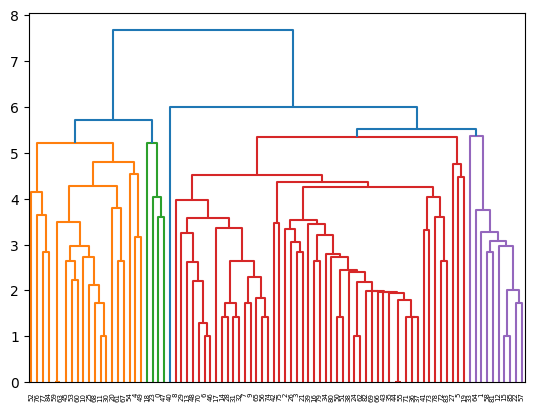

In [151]:

data = df.values
linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()



In [168]:
data = df.values
#linkage_data = linkage(df, method='ward', metric='euclidean')
names = df.index.to_list()

fig = ff.create_dendrogram(df, orientation='left', labels=names)
fig.update_layout(
    width=800, height=1300,
    #margin=dict(b=100)
    )

#fig.update_xaxes(tickvals=df.index.to_list())
fig.show()

['alliums',
 'asparagus',
 'beans, bush',
 'beans, pole',
 'beets',
 'brassicas',
 'broccoli',
 'cabbage',
 'carrots',
 'cauliflower',
 'celery',
 'chard',
 'corn',
 'cucumber',
 'cucurbits',
 'eggplant or aubergine',
 'kohlrabi',
 'leek',
 'legumes',
 'lettuce',
 'mustard',
 'nightshades',
 'okra',
 'onion',
 'parsnip',
 'peas',
 'peppers',
 'potato',
 'pumpkin',
 'radish',
 'spinach',
 'squash',
 'sweet potato',
 'tomatoes',
 'turnips and rutabagas',
 'apple',
 'apricot',
 'blueberries',
 'grapes',
 'passion fruit',
 'strawberries',
 'basil',
 'borage',
 'caraway',
 'catnip',
 'chamomile',
 'chervil',
 'chives',
 'cilantro / coriander',
 'dill',
 'fennel',
 'flax',
 'garlic',
 'hyssop',
 'lavender',
 'lemon grass',
 'lovage',
 'oregano',
 'parsley',
 'peppermint',
 'rosemary',
 'sage',
 'southernwood',
 'spearmint',
 'stinging nettle',
 'summer savoury',
 'tarragon',
 'thyme',
 'wormwood',
 'yarrow',
 'alyssum',
 'bee balm',
 'dianthus',
 'geraniums',
 'larkspur',
 'lupin',
 'marigol

In [147]:
df

columns,fruit trees,nightshades,tomatoes,capsicum peppers,potatoes,brassicas,carrots,beans,peas,parsley,...,pumpkins,plants which are prone to aphids,especially lettuce,swan plant,plants that attracts aphids and spider mites,sweet alyssum,lobelia,catmint,aphids,raspberries and relatives
alliums,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
asparagus,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"beans, bush",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"beans, pole",0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
beets,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sunflower,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
swan plant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0
sweet pea,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,-1.0,0.0
tansy,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
